In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [154]:
train = pd.read_csv("./data.csv")

In [155]:
train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,509,147,621,254
1,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,444,146,514,258
2,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,345,219,457,328
3,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,287,340,407,445
4,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,1,154,86,245


In [156]:
train['h'] = train['ymax'] - train['ymin']
train['w'] = train['xmax'] - train['xmin']

train['x'] = ( train['w'] // 2 ) + train['xmin']  
train['y'] = ( train['h'] // 2 ) + train['ymin'] 

In [157]:
train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,h,w,x,y
0,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,509,147,621,254,107,112,565,200
1,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,444,146,514,258,112,70,479,202
2,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,345,219,457,328,109,112,401,273
3,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,287,340,407,445,105,120,347,392
4,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,1,154,86,245,91,85,43,199


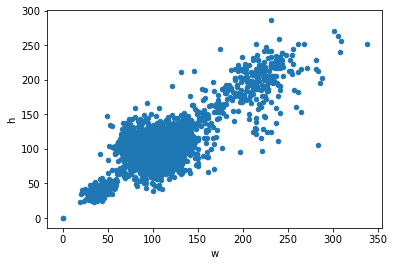

In [158]:
train[['h','w']].plot.scatter(x='w',y='h')

In [159]:
train[['h','w']].max(axis=0)

h    286
w    338
dtype: int64

In [160]:
train['xmin'],train['xmax'] = train['xmin'] / 640,train['xmax'] / 640
train['ymin'],train['ymax'] = train['ymin'] / 480,train['ymax'] / 480

train['x'],train['w'] = train['x'] / 640,train['w'] / 640
train['y'],train['h'] = train['y'] / 480,train['h'] / 480

In [161]:
train.head(3)

,filename,width,height,class,xmin,ymin,xmax,ymax,h,w,x,y
0,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,0.795312,0.306250,0.970313,0.529167,0.222917,0.175000,0.882812,0.416667
1,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,0.693750,0.304167,0.803125,0.537500,0.233333,0.109375,0.748437,0.420833
2,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,0.539062,0.456250,0.714063,0.683333,0.227083,0.175000,0.626563,0.568750


In [162]:
data = []
grouped = train.groupby(by='filename')

for i in train.filename.unique():
    boxes = list(grouped.get_group(i)[['class','x','y','w','h','xmin','ymin','xmax','ymax']].T.to_dict().values())
    data.append({
        'filename':i,
        'boxes':boxes
    })
    
data = np.array(data)

In [163]:
data[0]

{'filename': './JPEGImages/BloodImage_00266.jpg',
 'boxes': [{'class': 'RBC',
   'x': 0.8828125,
   'y': 0.4166666666666667,
   'w': 0.175,
   'h': 0.22291666666666668,
   'xmin': 0.7953125,
   'ymin': 0.30625,
   'xmax': 0.9703125,
   'ymax': 0.5291666666666667},
  {'class': 'RBC',
   'x': 0.7484375,
   'y': 0.42083333333333334,
   'w': 0.109375,
   'h': 0.23333333333333334,
   'xmin': 0.69375,
   'ymin': 0.30416666666666664,
   'xmax': 0.803125,
   'ymax': 0.5375},
  {'class': 'RBC',
   'x': 0.6265625,
   'y': 0.56875,
   'w': 0.175,
   'h': 0.22708333333333333,
   'xmin': 0.5390625,
   'ymin': 0.45625,
   'xmax': 0.7140625,
   'ymax': 0.6833333333333333},
  {'class': 'RBC',
   'x': 0.5421875,
   'y': 0.8166666666666667,
   'w': 0.1875,
   'h': 0.21875,
   'xmin': 0.4484375,
   'ymin': 0.7083333333333334,
   'xmax': 0.6359375,
   'ymax': 0.9270833333333334},
  {'class': 'RBC',
   'x': 0.0671875,
   'y': 0.41458333333333336,
   'w': 0.1328125,
   'h': 0.18958333333333333,
   'xmin': 0

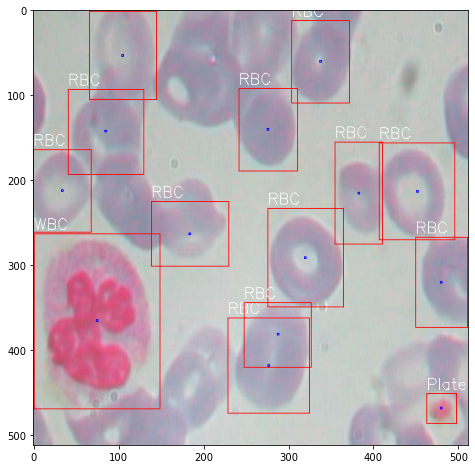

In [164]:
image = data[0]

img = cv2.imread(image['filename'])
img = cv2.resize(img,(512,512))

for box in image['boxes']:
    img = cv2.putText(img,box['class'],(int(box['xmin']*512),int(box['ymin']*512)-5),cv2.FONT_HERSHEY_SIMPLEX,0.6,(255,255,255))
    img = cv2.rectangle(
            img,
            (int(box['xmin']*512),int(box['ymin']*512)),
            (int(box['xmax']*512),int(box['ymax']*512)),
            (255,0,0),
            1
        )
    img = cv2.rectangle(
            img,
            (int(box['x']*512)-1,int(box['y']*512)-1),
            (int(box['x']*512)+1,int(box['y']*512)+1),
            (0,0,255),
            1
        )

plt.figure(figsize=(12,8))
plt.imshow(img)

In [165]:
images = np.array([cv2.imread(i['filename']) for i in data])
images = tf.image.resize(images,(512,512),tf.image.ResizeMethod.BICUBIC).numpy() / 255.

### Generating Anchor Grid

In [210]:
grid_stride = 32
img_height = 512
img_width = 512

## Grid

h_size,w_size = img_height // grid_stride,img_width // grid_stride 

xx,yy = np.meshgrid(np.arange(w_size),np.arange(h_size))
xx,yy = np.reshape(xx,(h_size,w_size,1)),np.reshape(yy,(h_size,w_size,1))

grid = np.concatenate((yy,xx),axis=-1)
grid = grid * grid_stride

In [279]:
# box_sizes = np.array([64,128,256])
# box_ratios = np.array([0.5,1.,1.5]) # Width to height ratio
# boxes_h = np.matmul(box_sizes.reshape(3,1),box_ratios.reshape(1,3)).reshape(-1,1)
# boxes_w = np.repeat(box_sizes.reshape(3,1),3,axis=1).reshape(-1,1)
# boxes_size = np.concatenate((boxes_h,boxes_w),axis=1).astype(np.uint)

In [297]:
boxes_size = np.array([
    [32,64],
    [48,48],
    [64,32],
    [64,128],
    [96,96],
    [128,64],
    [256,128],
    [192,192],
    [128,256]
])

In [298]:
boxes_size

array([[ 32,  64],
       [ 48,  48],
       [ 64,  32],
       [ 64, 128],
       [ 96,  96],
       [128,  64],
       [256, 128],
       [192, 192],
       [128, 256]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


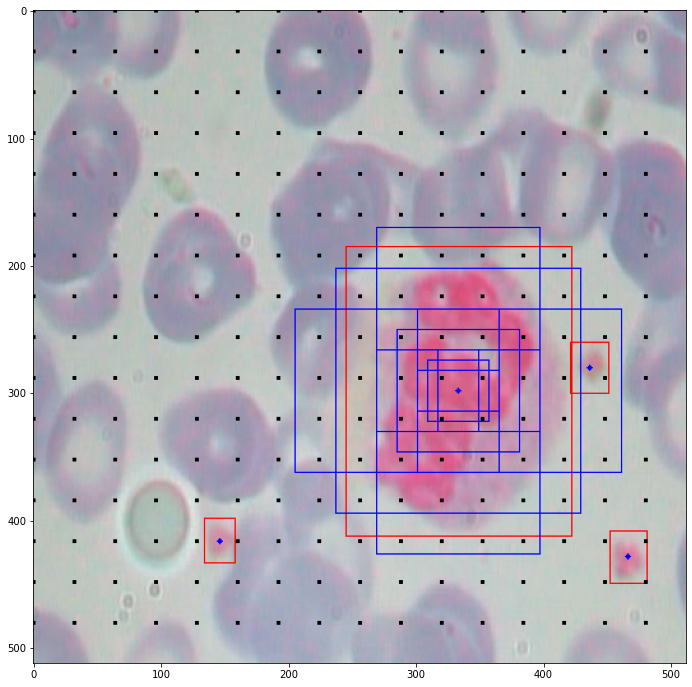

In [332]:
i = 5#np.random.randint(images.shape[0])

img = images[i].copy()

dat = data[i]

for b in dat['boxes']:
    img = cv2.rectangle(
                img,
                (int(b['xmin']*512),int(b['ymin']*512)),
                (int(b['xmax']*512),int(b['ymax']*512)),
                (255,0,0)
        )
    img = cv2.circle(img,(int(b['x']*512),int(b['y']*512)),2,(0,0,255),-1)

b = dat['boxes'][3]
for hh,ww in boxes_size:
    img = cv2.rectangle(
        img,
        (int(b['x']*512) - (ww//2) ,int(b['y']*512) - (hh//2) ),
        (int(b['x']*512) + (ww//2) ,int(b['y']*512) + (hh//2) ),
        (0,0,255),
        1
    )
    
for y,x in grid.reshape((-1,2)):
    img = cv2.rectangle(img,(x-1,y-1),(x+1,y+1),(0,0,0),-1)

plt.figure(figsize=(12,12))
plt.imshow(img)

In [334]:
boxes = np.array(   [[  int(b['ymin']*img_height),
                        int(b['xmin']*img_width),
                        int(b['ymax']*img_height),
                        int(b['xmax']*img_width)   ] for b in data[i]['boxes']])

boxes_coord = np.array( [[  int(b['y']*img_height),
                            int(b['x']*img_width),
                            int(b['h']*img_height),
                            int(b['w']*img_width)   ] for b in data[i]['boxes']])

In [23]:
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.layers import *

In [25]:
inp = Input(shape=(512,512,3))
resnet = keras.applications.resnet.ResNet50(include_top=False,input_tensor=inp,weights="imagenet")

In [40]:
conf_score = Dense(2,activation="softmax")(resnet.output)

model = keras.Model(inp,conf_score)